In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import re
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA

## Loading the dataset

In [3]:
# Read datasets/papers.csv into papers
papers = pd.read_csv("D:\\datasets\\papers.csv")
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## Preparing the data for analysis

In [4]:
papers.drop(['id','event_type','pdf_name'], axis=1, inplace=True)
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## Bar Chart for the number of publications per year

Text(0.5, 0, 'Year')

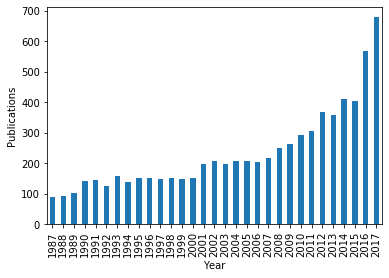

In [5]:
# Group the papers by year
groups = papers.groupby('year')
# Determine the size of each group
counts = groups.size()

counts.plot(kind='bar')
plt.ylabel("Publications")
plt.xlabel("Year")

## Preprocessing the text data

In [6]:
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

papers['title_processed'][:5]

0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

## Word Cloud

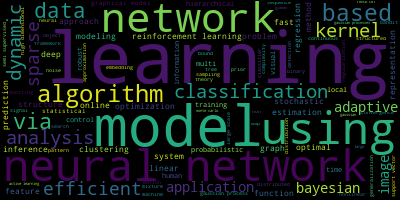

In [7]:
long_string = " ".join(papers['title_processed'])

wordcloud = wordcloud.WordCloud()
wordcloud.generate(long_string)

wordcloud.to_image()

## Processing the titles for LDA analysis

In [8]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

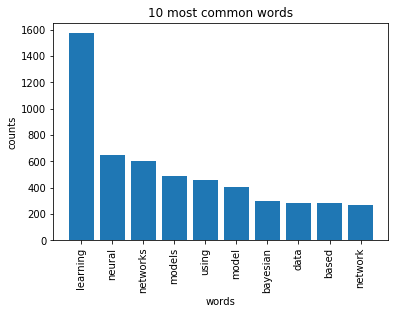

In [9]:
count_vectorizer = CountVectorizer(stop_words='english') 

count_data = count_vectorizer.fit_transform(papers['title_processed'])

plot_10_most_common_words(count_data, count_vectorizer)

## LDA Analysis

In [12]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx+1))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [16]:
number_topics = 10
number_words = 10

lda = LDA(n_components=number_topics)
lda.fit(count_data)

print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #1:
using analysis markov learning models hidden processes classification decision component

Topic #2:
learning multi stochastic optimization gradient convex online minimization descent algorithms

Topic #3:
clustering matrix estimation rank spectral data sparse order low high

Topic #4:
learning vector data feature support large machines visual model scale

Topic #5:
learning time reinforcement neural networks optimal linear systems inference continuous

Topic #6:
neural networks network recurrent deep recognition learning training model based

Topic #7:
detection model object visual learning based human using neighbor 3d

Topic #8:
learning gaussian supervised inference variational graph semi propagation information processes

Topic #9:
model estimation regression natural using method sparse density coding kernel

Topic #10:
models learning graphical bayesian latent inference monte carlo online gaussian
